In [1]:
# Continue with drinking data
# step3) 데이터 전처리
# 이전에 continent가 존재하지 않는 값 (결측치)가 있는 것을 확인함
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context = 'notebook')

drinks = pd.read_csv('drinks.csv')
print(drinks.isnull().sum())
print("---------------------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
---------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [2]:
drinks['continent'] = drinks['continent'].fillna('OT')
# 결측 데이터 처리 : other continents -> 'OT'
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


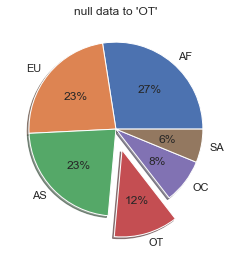

In [3]:
# 전체 국가 중 continent 가 OT로 기입된 국가의 비율 확인 -> pie chart
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25, 0,0)
plt.pie(fracs1, explode = explode, labels = labels, autopct = '%.0f%%', shadow = True)
plt.title('null data to \'OT\'')
plt.show()

In [4]:
print(drinks['continent'].value_counts())
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
print(labels)
print(fracs1)

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64
['AF', 'EU', 'AS', 'OT', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


In [5]:
# step4) 여러가지 질문들로 분석하는 개념적 탐색
# ex1) 대륙별 spirit_servings의 통계적 정보는 어느정도?
# using agg()
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [6]:
# agg()
df = pd.DataFrame([[1,2,3],
                 [4,5,6],
                 [7,8,9],
                 [np.nan,np.nan, np.nan]],columns = ['A','B','C'])
df.agg(['sum','min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [7]:
df.agg({'A':['sum','min'], 'B':['min','max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [8]:
df.agg('mean',axis = 'columns')
#axis = 1(columns) : 같은 행에 대해 적용

0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64

In [9]:
df.agg('mean',axis = 0)
#axis = 0(index) : 같은 열에 대해 적용

A    4.0
B    5.0
C    6.0
dtype: float64

In [10]:
#ex1) 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean] ## 한 줄로 모든 continent 비교처리 가능
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [11]:
# ex2) 평균 beer_servings 수치가 가장 높은 대륙은 어디일까?
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
#idxmax() : sort해서 최대인 값에 해당하는 index return
print(beer_continent)

EU


In [12]:
# pandas.DataFrame.idxmax()
# parameters : axis=0, skipna = True
df = pd.DataFrame({'consumption': [10.51,103.11, 55.48],
                  'co2_emissions' : [37.2, 19.66, 1712]},
                 index = ['Pork','Wheat Products', 'Beef'])
print(df)

                consumption  co2_emissions
Pork                  10.51          37.20
Wheat Products       103.11          19.66
Beef                  55.48        1712.00


In [13]:
df.idxmax()  # idxmax by index (열별로 최대인 index를 return)

consumption      Wheat Products
co2_emissions              Beef
dtype: object

In [14]:
df.idxmax(axis = 'columns') # idxmax by columns (행별로 최대인 index return)

Pork              co2_emissions
Wheat Products      consumption
Beef              co2_emissions
dtype: object

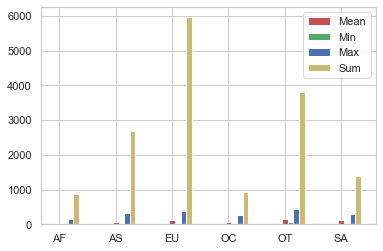

In [15]:
# ex3) 대륙별 spirit_servings의 평균, 최소, 최대, 합계 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
index = np.arange(n_groups)
bar_width = 0.1
rects1 = plt.bar(index, means, bar_width, color = 'r', label = 'Mean')
rects2 = plt.bar(index+bar_width, mins, bar_width, color = 'g', label = 'Min')
rects3 = plt.bar(index+bar_width*2, maxs, bar_width, color = 'b', label = 'Max')
rects4 = plt.bar(index+bar_width*3, sums, bar_width, color = 'y', label = 'Sum')
plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

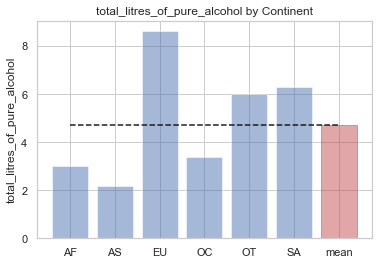

In [16]:
# ex4) 대륙별 총 주류 소비량 (total_litres_of_pure_alcohol)을 시각화
total_mean = drinks.total_litres_of_pure_alcohol.mean()  #전체 평균

continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continents = continent_mean.index.tolist()
continents.append('mean')

x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents)-1].set_color('r')   #평균값은 red 로 표시
plt.plot([0.,6], [total_mean, total_mean], "k--")
#0~5위에 k-- 선으로 total_mean (값)을 표시

plt.xticks(x_pos, continents)
plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

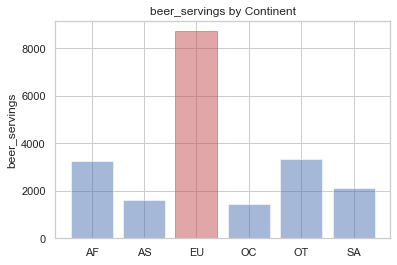

In [17]:
# ex5) 대륙별 맥주 소비량 (beer_servings)을 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist() #values of beer_group to list

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
plt.show()

In [18]:
# SciPy를 활용한 t-test 예제 : 아프리카와 유럽간의 맥주 소비량 차이 검정
import pandas as pd
drinks = pd.read_csv('drinks.csv')

africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var = False)
# ttest_ind() 에 두 집단의 series data -> return t-value, p-value
# equal_var : default(True)-분산이 같은 경우, False-분산이 다른 경우
print("The t-statistic and p-value assuming equal variance is %.3f and %.3f." %tTestResult)
print("The t-statistic and p-value not assuming equal variance is %.3f and %.3f." %tTestResultDiffVar)

The t-statistic and p-value assuming equal variance is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variance is -7.144 and 0.000.


1) 분산이 같을때 : t-value : -7.268, p-value는0

2) 분산이 다르다고 할때 :  t-value: -7.144, p-value는0

t 값이 매우 작기 때문에 그래프 상에서 기각역 부분이 매우 작다..

즉, t-test의 귀무가설 : "두 모집단의 평균간의 차이는 없다."

p-value가 0 : 귀무가설이 기각된다.

*** 아프리카와 유럽대륙 간의 맥주소비량 차이는 통계적으로 유의미하다!!

In [19]:
# 대한민국은 술을 얼마나 독하게 마시는 나라일까?
import pandas as pd
drinks = pd.read_csv('drinks.csv')

#total_servings feature
drinks['total_servings'] = drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']

# 술소비량 대비 alcohol 비율 feature 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)   # na인것은 0으로채워라

#순위 정보 생성
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'],ascending = 0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


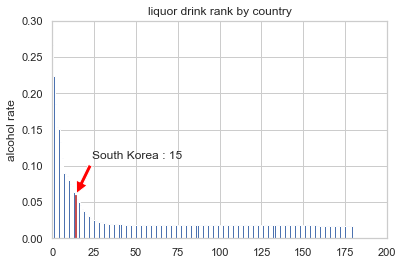

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#국가별 순위 정보를 그래프로 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos,rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0,200,0,0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country']=="South Korea"]['alcohol_rate'].values[0]
plt.annotate("South Korea : "+ str(korea_rank+1), xy = (korea_rank, korea_alc_rate), xytext=(korea_rank+10, korea_alc_rate+0.05),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

In [21]:
# 탐색적 분석 사례3: 타이타닉 탑승자 데이터 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
df_train = pd.read_csv("titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None


In [22]:
df_train.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
5,3,0,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q,NaN,NaN
6,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,NaN,NaN
7,2,1,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S,NaN,"Plymouth, Devon / Detroit, MI"
8,1,0,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,NaN,"Haverford, PA"
9,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,NaN,"St Louis, MO"


In [23]:
# 생존자 분류 모델에 영향을 끼치지 않는 feature 제거
df_train = df_train.drop(['name','ticket','body','cabin','home.dest'], axis=1)
df_train.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.0,0,1,19.5000,S
1,2,1,female,4.0,1,1,23.0000,S
2,2,1,female,30.0,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.0,0,0,7.7250,Q


0    563
1    353
Name: survived, dtype: int64


<AxesSubplot:>

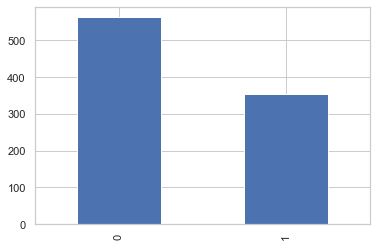

In [24]:
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()
# 생존자와 비생존자 그룹을 나누어 feature그룹 차이 탐색

3    498
1    230
2    188
Name: pclass, dtype: int64


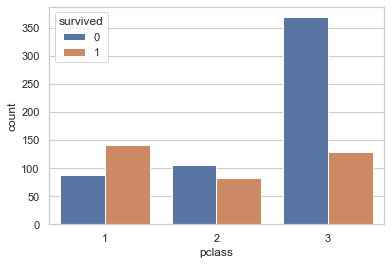

In [25]:
# 승객 등급 (pclass)에 따른 생존자/비생존자 그룹 분포
print(df_train['pclass'].value_counts())
ax = sns.countplot(x='pclass',hue = 'survived',data = df_train)

In [26]:
from scipy import stats
def valid_features(df, col_name, distribution_check=True):
    # 두 집단(survived =1, survived=0)의 분포 그래프
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)
    
    #두 집단의 표준편차
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", "%.2f" %np.std(titanic_survived_static))
    
    titanic_n_survived = df[df['survived']==0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is", "%.2f" %np.std(titanic_n_survived_static))
    
    # T- test로 두 집단 평균 차이 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name],titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name],titanic_n_survived[col_name],equal_var = False)
    print("The t-statistic and p-value assuming equal variance is %.3f and %.3f." %tTestResult)
    print("The t-statistic and p-value not assuming equal variance is %.3f and %.3f." %tTestResultDiffVar)
    

data std is 14.22
data std is 13.71
The t-statistic and p-value assuming equal variance is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variance is -0.543 and 0.587.


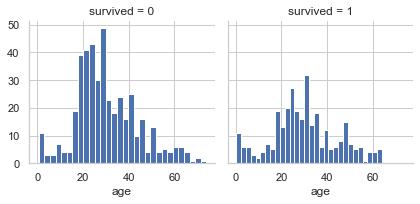

In [27]:
# age feature 탐색, 검정 결과
valid_features(df_train[df_train['age']>0], 'age', distribution_check=True)

t-test의 귀무가설("두 모집단의 평균간의 차이는 없다") 채택 (p-value가 0.5 이상)

-> 나이에 따른 두 집단의 평균차이는 없다

-> 나이가 생존 여부에 영향을 미치진 않았다.


data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variance is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variance is -2.446 and 0.015.


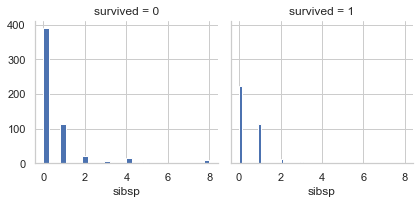

In [28]:
valid_features(df_train, 'sibsp', distribution_check = False)

t-test의 귀무가설("두 모집단의 평균간의 차이는 없다") 는 기각에 가깝다. (p-value가 0.05보다 작다..)

-> 형제 수나 배우자 유무에 따른 두 집단의 평균 차이가 다소 있다

-> 형제 수나 배우자 유무가 생존 여부에 다소 영향을 미친다.

data std is 0.88
data std is 0.75
The t-statistic and p-value assuming equal variance is -9.848 and 0.000.
The t-statistic and p-value not assuming equal variance is -9.507 and 0.000.


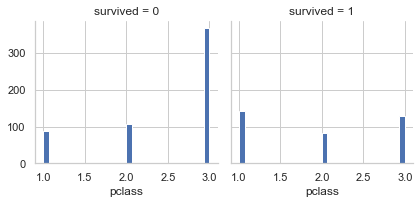

In [29]:
valid_features(df_train, 'pclass', distribution_check = False)

data std is 0.74
data std is 0.89
The t-statistic and p-value assuming equal variance is 1.865 and 0.063.
The t-statistic and p-value not assuming equal variance is 1.942 and 0.052.


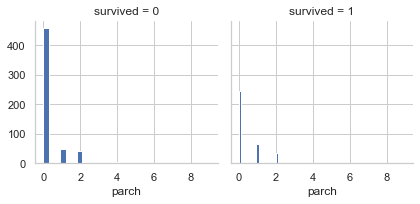

In [30]:
valid_features(df_train, 'parch', distribution_check = False)

data std is 60.68
data std is 33.65
The t-statistic and p-value assuming equal variance is 7.523 and 0.000.
The t-statistic and p-value not assuming equal variance is 6.657 and 0.000.


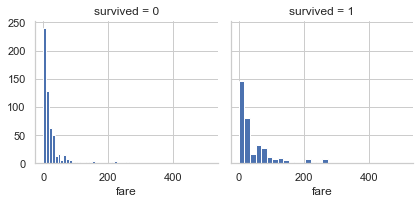

In [31]:
valid_features(df_train, 'fare', distribution_check = False)